# Plots and images for papers

This notebook is used to generate various plots and images for publications and slide decks. It is not well-documented, but provides tips that show how to plot various things.

In [1]:
import numpy as np
import glob,os
%pylab inline --no-import-all
plt.rc('font', family='serif', serif='Times',size=15)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure',titlesize=25)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['axes.linewidth'] = 2.

import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('main')
from crispy.tools.image import Image
os.chdir('/Users/mrizzo/IFS/crispy/crispy/PISCES/')
from params import Params
par = Params()
par.hdr

Populating the interactive namespace from numpy and matplotlib


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  108 / # lenslets across array                        
PITCH   =             0.000174 / Lenslet pitch (meters)                         
INTERLAC=                    2 / Interlacing                                    
PHILENS =    26.565051177077

In [2]:
cmap = 'RdBu'

### Constructing new colormap

In [3]:
import matplotlib as mpl 
C = np.array([(69,6,90), (42,118,142), (73,193,109), (243,229,30), (255,255,255)]).T
# C = np.array([(255,255,255),(243,229,30),(73,193,109),(42,118,142),(69,6,90)]).T
from scipy.interpolate import interp1d

fitvector = [0.0,1.,2.,3,4.]
vector = np.arange(0.0,C.shape[1]-1,0.01)
Rinter = interp1d(fitvector,C[0,:])
R = Rinter(vector)
Ginter = interp1d(fitvector,C[1,:])
G = Ginter(vector)
Binter = interp1d(fitvector,C[2,:])
B = Binter(vector)
newC = np.zeros((3,len(vector)))
newC[0,:] = R
newC[1,:] = G
newC[2,:] = B
cm = mpl.colors.ListedColormap(newC.T/255.0)
cmap=cm

### Flatfield

crispy - INFO - Read data from HDU 1 of ..//ReferenceFiles/Calibra_170425//lenslet_flat.fits
crispy - INFO - Read data from HDU 1 of ..//ReferenceFiles/Calibra_170425//lenslet_mask.fits


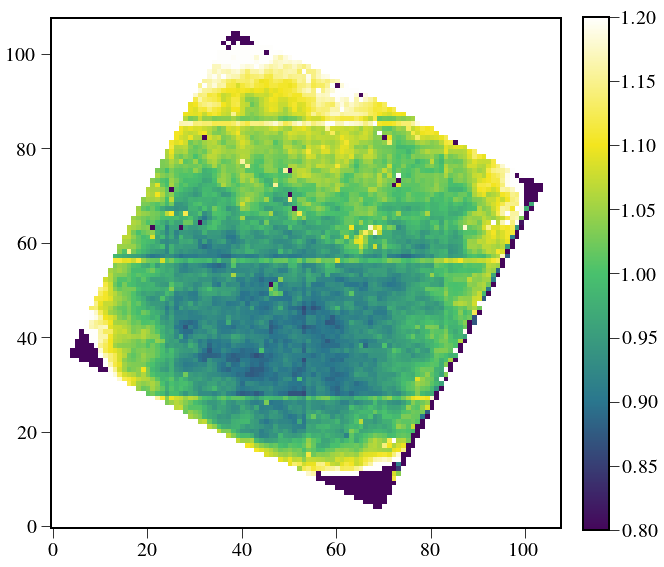

In [4]:
lenslet_flat = Image(par.wavecalDir+"/lenslet_flat.fits").data
lenslet_mask = Image(par.wavecalDir+"/lenslet_mask.fits").data

plt.figure(figsize=(10,10))
plt.imshow(lenslet_flat*lenslet_mask, cmap=cmap,vmin=0.8,vmax=1.2)
plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig("/Users/mrizzo/Downloads/PISCESthroughput.png")        

plt.show()


### PSFLets

crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_170425//hires_psflets_lam605.fits


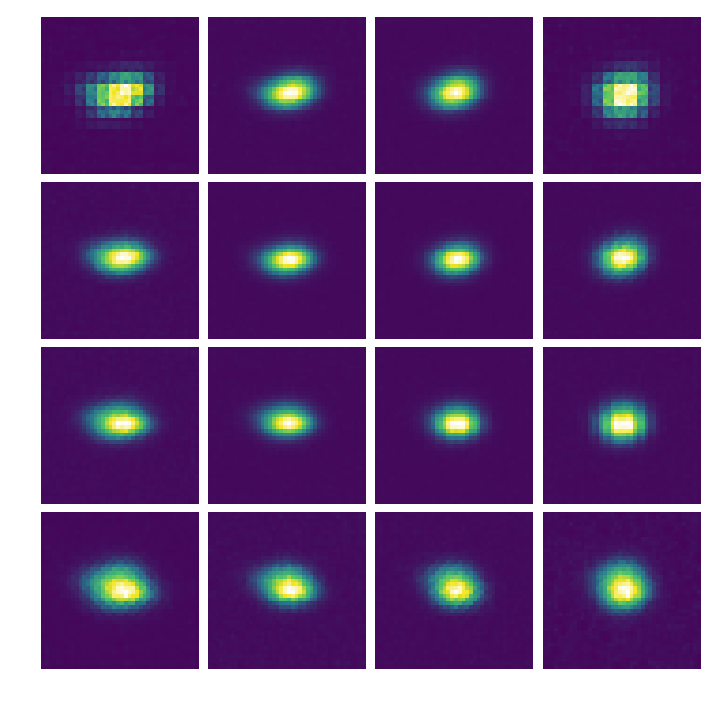

In [5]:
psflets = Image(par.wavecalDir+"/hires_psflets_lam605.fits").data
fig, axarr = plt.subplots(4,4,figsize=(12,12))
for i in range(psflets.shape[0]):
    for j in range(psflets.shape[1]):
        
        axarr[i,j].imshow(psflets[i,j],vmin=0.0,cmap=cmap)
        axarr[i,j].axis('off')
plt.subplots_adjust(wspace=0.0,hspace=0.05)
plt.savefig(par.wavecalDir+"psflets.png")        
plt.savefig("/Users/mrizzo/Downloads/Psflets.png")        
plt.show()


### Extract cutout of microspectrum

crispy - INFO - Read data from HDU 1 of ..//Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_170425//polychromeR70.fits
(12,)
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsO

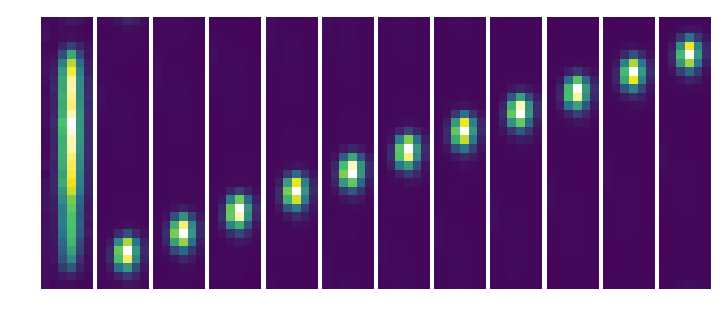

In [6]:
from crispy.tools.locate_psflets import PSFLets
from crispy.tools.reduction import get_cutout
from crispy.unitTests import testCutout
lensnum = 0
subim = testCutout(par,par.codeRoot+'/Inputs/BB.fits',lensX=lensnum,lensY=lensnum)
polychrome = Image(par.wavecalDir+'/polychromeR70.fits').data
polyshape = polychrome.shape
fig, axarr = plt.subplots(1,12,figsize=(12,12))
print axarr.shape
axarr[0].imshow(subim.T,cmap=cmap)
axarr[0].axis('off')
for i in range(1,polyshape[0]+1):
    axarr[i].imshow(testCutout(par,polychrome[i-1],lensX=lensnum,lensY=lensnum).T,cmap=cmap)
    axarr[i].axis('off')
plt.subplots_adjust(wspace=0.1,hspace=0.05)
plt.savefig('/Users/mrizzo/Downloads/Microspectrum.png',dpi=200)
plt.show()

crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Read data from HDU 1 of ..//Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
crispy - INFO - Read data from HDU 1 of ..//Inputs/BB.fits
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_170425//polychromeR70.fits
(12,)
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits
[518, 524, 537, 569]
crispy - INFO -

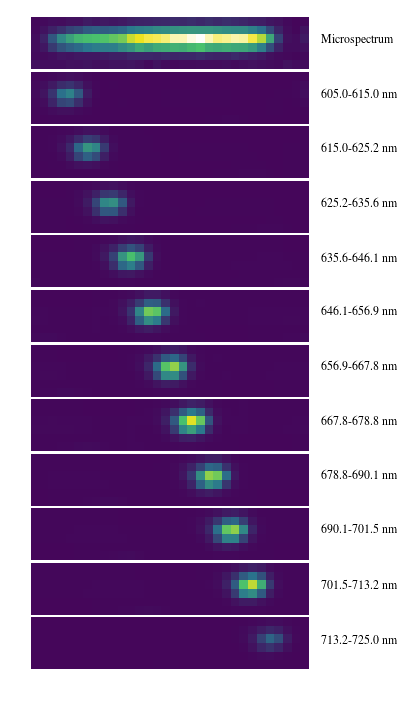

In [8]:
from crispy.tools.locate_psflets import PSFLets
from crispy.tools.reduction import get_cutout,calculateWaveList
from crispy.unitTests import testCutout,testFitCutout
lensnum = 0
lam_midpts,lam_endpts = calculateWaveList(par)
subim = testCutout(par,par.codeRoot+'/Inputs/BB.fits',lensX=lensnum,lensY=lensnum)
spectrum = testFitCutout(par,par.codeRoot+'/Inputs/BB.fits',lensX=lensnum,lensY=lensnum)

polychrome = Image(par.wavecalDir+'/polychromeR70.fits').data
polyshape = polychrome.shape
fig, axarr = plt.subplots(12,figsize=(12,12))
print axarr.shape
axarr[0].imshow(subim,cmap=cmap)
axarr[0].annotate('Microspectrum',xy=(33,2.5),annotation_clip=False,fontsize=12)
axarr[0].axis('off')
for i in range(1,polyshape[0]+1):
    axarr[i].imshow(spectrum[i-1]*testCutout(par,polychrome[i-1],lensX=lensnum,lensY=lensnum),cmap=cmap,vmin=0.0,vmax=np.amax(subim))
    axarr[i].annotate('%.1f-%.1f nm' % (lam_endpts[i-1],lam_endpts[i]),xy=(33,2.5),annotation_clip=False,fontsize=12)
    axarr[i].axis('off')
plt.subplots_adjust(wspace=0.00,hspace=0.05)
plt.savefig('/Users/mrizzo/Downloads/MicrospectrumVertical.png',dpi=200)
plt.show()

### Test fit cutout

crispy - INFO - Read data from HDU 1 of ..//Inputs/BB.fits
crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Writing data to ..//SimResults/BB_red_lstsq_resid.fits
crispy - INFO - Writing data to ..//SimResults/BB_red_lstsq_model.fits
crispy - INFO - Elapsed time: 4.783581s
crispy - INFO - Read data from HDU 1 of ..//Inputs/BB.fits
crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Writing data to ..//SimResults/BB_red_RL_resid.fits
crispy - INFO - Writing data to ..//SimResults/BB_red_RL_model.fits
crispy - INFO - Elapsed time: 4.834926s
crispy - INFO - Read data from HDU 1 of ..//Inputs/BB.fits
crispy - INFO - Reduced cube will have 26 wavelength bins
crispy - INFO - Elapsed time: 1.901001s
[  951.02891344  1149.83444733  1295.6083321   1403.46848443  1443.06914822
  1466.20760415  1542.50940043  1697.66312893  1987.37643762  2133.16578058
  2178.68202843  2274.23349939  2351.61877136  2449.25201546  2455.20231101
  2594.05355765  2639.3

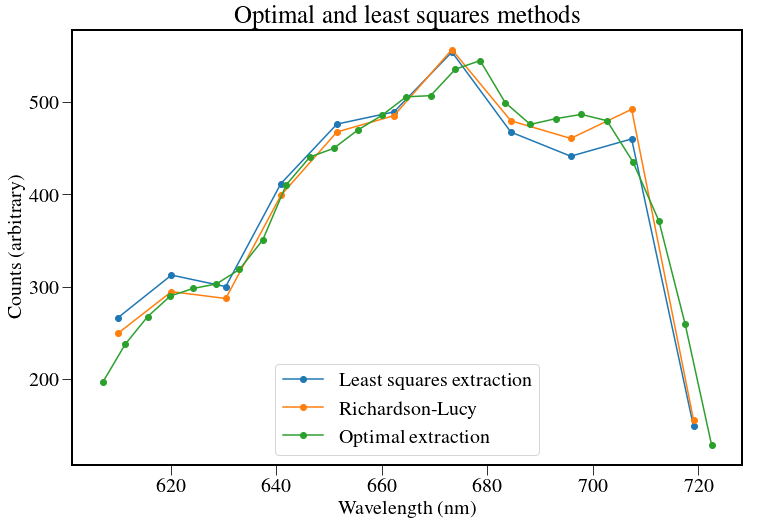

In [9]:
from crispy.unitTests import testFitCutout
from crispy.IFS import reduceIFSMap
spectral_cube = reduceIFSMap(par,par.codeRoot+'/Inputs/BB.fits',method='lstsq',smoothbad = False)
RL_cube = reduceIFSMap(par,par.codeRoot+'/Inputs/BB.fits',method='RL',smoothbad = False)
spectrum = spectral_cube.data[:,54,54]
spectrumRL = RL_cube.data[:,54,54]
optspect = reduceIFSMap(par,par.codeRoot+'/Inputs/BB.fits',method='optext')
print optspect.data[:,54,54]
plt.figure(figsize=(12,8))
lam_midpts,lam_endpts = calculateWaveList(par)
print lam_midpts
# plt.plot(lam_midpts,spectrum,linewidth=2,color='#1f77b4')
# plt.plot(lam_midpts,spectrum,'o-',color='#1f77b4')
plt.plot(lam_midpts,spectrum,'o-')
ratio = np.mean(spectrum)/np.mean(spectrumRL)
plt.plot(lam_midpts,spectrumRL*ratio,'o-')
lam_midpts,lam_endpts = calculateWaveList(par,method="optext")
print lam_midpts
spect = optspect.data[:,54,54]
ratio = np.mean(spectrum)/np.mean(spect)
print ratio
# plt.plot(lam_midpts,spect*ratio,'o-',color='#d62728')
plt.plot(lam_midpts,spect*ratio,'o-')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Wavelength (nm)',fontsize=20)
plt.ylabel('Counts (arbitrary)',fontsize=20)
plt.title('Optimal and least squares methods',fontsize=25)
plt.legend(["Least squares extraction","Richardson-Lucy","Optimal extraction"],fontsize=20)
plt.savefig('/Users/mrizzo/Downloads/OptimalVSlstsq.png',dpi=200)
plt.show()

### Optimal extraction

crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Read data from HDU 1 of ..//Inputs/BB.fits
[518, 524, 537, 569]
crispy - INFO - Writing data to ..//unitTestsOutputs/cutout.fits


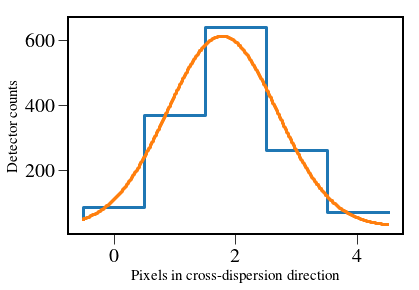

In [10]:
from crispy.tools.locate_psflets import PSFLets
from crispy.tools.reduction import get_cutout,calculateWaveList
from crispy.unitTests import testCutout,testFitCutout
import scipy
from scipy.special import erf

lensnum = 0
slicenum_list = [10]
for i in range(len(slicenum_list)):
    slicenum=slicenum_list[i]
    lam_midpts,lam_endpts = calculateWaveList(par)
    subim = testCutout(par,par.codeRoot+'/Inputs/BB.fits',lensX=lensnum,lensY=lensnum)
    plt.figure(figsize=(6,4))
    x = np.arange(len(subim.T[slicenum]))-0.5
    sig=2/2.35
    plt.step(x,subim.T[slicenum],linewidth=3)
    x2 = np.arange(0,len(subim.T[slicenum])-1,0.01)-0.5
    val = np.mean(np.sum(x[:,np.newaxis]*subim,axis=0)/np.sum(subim,axis=0))
    template = np.exp(-(x-val)**2/2./sig**2)/sig/np.sqrt(2.*np.pi)
    template = (erf((x + 0.5 -val) / (np.sqrt(2) * sig)) - erf((x - 0.5-val) / (np.sqrt(2) * sig)))
    val2 = val-0.5
    template2 = (erf((x2 + 0.5 -val2) / (np.sqrt(2) * sig)) - erf((x2 - 0.5-val2) / (np.sqrt(2) * sig)))
    b, a, _, _, _ = scipy.stats.linregress(template,subim.T[slicenum])
    plt.step(x2,a+b*template2,linewidth=3)
    plt.xlabel('Pixels in cross-dispersion direction',fontsize=15)
    plt.ylabel('Detector counts',fontsize=15)
#plt.legend(["Pixel values in column","Gaussian matched filter"],fontsize=15)
plt.savefig('/Users/mrizzo/Downloads/Optimal_extraction.png',dpi=200)
plt.show()

### Plot distortion map

After thinking more about this, this is maybe not the correct way to calculate the distortion map...

665.0
-3.0 -0.5


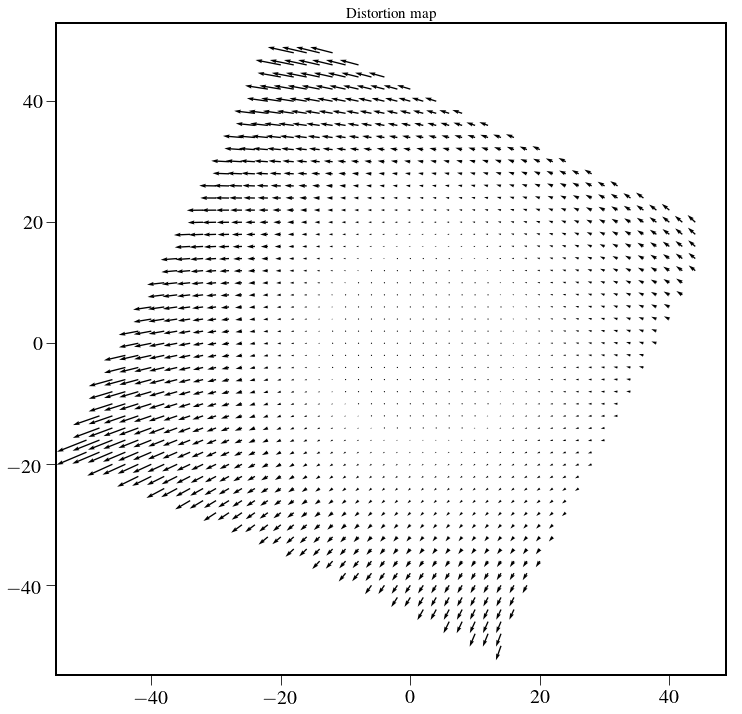

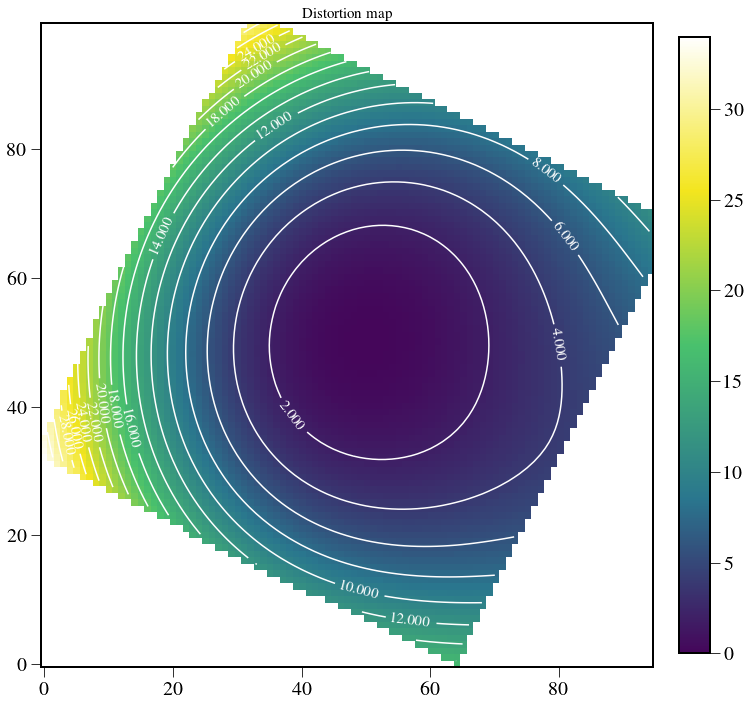

In [11]:
from crispy.tools.locate_psflets import PSFLets
psftool = PSFLets()
lamlist = np.loadtxt(par.wavecalDir + "lamsol.dat")[:, 0]
allcoef = np.loadtxt(par.wavecalDir + "lamsol.dat")[:, 1:]

psftool.geninterparray(lamlist, allcoef)

# xindx = np.arange(-par.nlens/2, par.nlens/2)
# xindx, yindx = np.meshgrid(xindx, xindx)
xindx = np.arange(-50, 45)
yindx = np.arange(-50, 50)
lx = len(xindx)
ly = len(yindx)
xindx, yindx = np.meshgrid(xindx, yindx)
print lamlist[6]
allcoef_ideal = np.zeros(allcoef.shape)
indx = np.asarray([0, 1, 4, 10, 11, 14])
allcoef_ideal[:,indx] = allcoef[:,indx]
x,y = psftool.return_locations(lamlist[6], allcoef, yindx, xindx)
borderpix=4
good = (x > borderpix)*(x < 1024-borderpix)*(y > borderpix)*(y < 1024-borderpix)

psftool.geninterparray(lamlist, allcoef_ideal)
X,Y = psftool.return_locations(lamlist[6], allcoef_ideal, yindx, xindx)

U = x-X
V = y-Y
U[~good]= np.NaN
V[~good]= np.NaN

plt.figure(figsize=(12,12))
Q = plt.quiver(xindx[::2,::2], yindx[::2,::2], U[::2,::2], V[::2,::2],width=0.002,scale=700)
#plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Distortion map',fontsize=15)
#qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

plt.figure(figsize=(12,12))
plt.imshow(np.sqrt(U**2+V**2),cmap=cmap)
plt.title('Distortion map',fontsize=15)
plt.colorbar(fraction=0.046, pad=0.04)
print np.median(xindx[0,:]),np.median(yindx[:,0])
CS = plt.contour(xindx-np.median(xindx[0,:])+lx//2,yindx-np.median(yindx[:,0])+ly//2,np.sqrt(U**2+V**2),20,colors='w')
plt.clabel(CS, fontsize=15, inline=1)
plt.show()

In [12]:
from crispy.tools.locate_psflets import PSFLets
psftool = PSFLets()
lamlist = np.loadtxt("/Users/mrizzo/IFS/charis-dep/code/calibrations/lowres/lamsol.dat")[:, 0]
allcoef = np.loadtxt("/Users/mrizzo/IFS/charis-dep/code/calibrations/lowres/lamsol.dat")[:, 1:]
print lamlist
import sys
psftool.geninterparray(lamlist, allcoef)
newcoefs = psftool.monochrome_coef(1550., lamlist, allcoef, order=3)
print newcoefs

[ 1096.63315843  1107.6545049   1118.78661775  1130.03061019  1141.38760663
  1152.85874278  1164.44516577  1176.14803425  1187.96851851  1199.90780061
  1211.96707449  1224.14754609  1236.45043347  1248.87696691  1261.4283891
  1274.10595517  1286.91093291  1299.8446028   1312.90825825  1326.10320561
  1339.43076439  1352.89226737  1366.48906071  1380.22250409  1394.09397087
  1408.1048482   1422.2565372   1436.55045304  1450.98802511  1465.5706972
  1480.29992758  1495.17718919  1510.20396976  1525.38177199  1540.71211367
  1556.19652784  1571.83656296  1587.63378304  1603.58976783  1619.70611293
  1635.98443     1652.42634686  1669.03350774  1685.80757337  1702.75022115
  1719.86314538  1737.14805735  1754.60668558  1772.24077593  1790.05209184
  1808.04241446  1826.21354282  1844.56729405  1863.10550356  1881.83002516
  1900.74273134  1919.84551337  1939.14028156  1958.62896539  1978.31351375
  1998.1958951   2018.27809772  2038.56212982  2059.05001984  2079.74381657
  2100.6455894

## Generic SPIE images

Populating the interactive namespace from numpy and matplotlib
crispy - INFO - Reduced cube will have 26 wavelength bins
[ 607.10887147  611.34869295  615.61812376  619.91737068  624.24664194
  628.6061472   632.99609763  637.41670582  641.86818589  646.35075344
  650.86462556  655.41002088  659.98715953  664.59626322  669.23755516
  673.91126015  678.61760456  683.35681631  688.12912494  692.9347616
  697.77395902  702.64695159  707.55397533  712.49526788  717.47106857
  722.48161839]
[ 600.6  603.3  606.   608.7  611.4  614.1  616.8  619.5  622.2  624.9
  627.6  630.3  633.   635.7  638.4  641.1  643.8  646.5  649.2  651.9
  654.6  657.3  660.   662.7  665.4  668.1  670.8  673.5  676.2  678.9
  681.6  684.3  687.   689.7  692.4  695.1  697.8  700.5  703.2  705.9
  708.6  711.3  714.   716.7  719.4]
crispy - INFO - Read data from HDU 0 of /Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_031.fits
(45, 315, 315)
(175, 235)
3.35319633686e-13


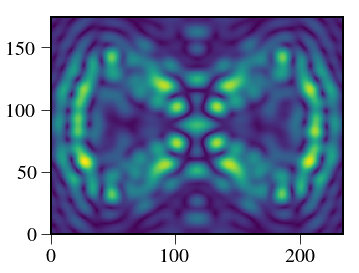

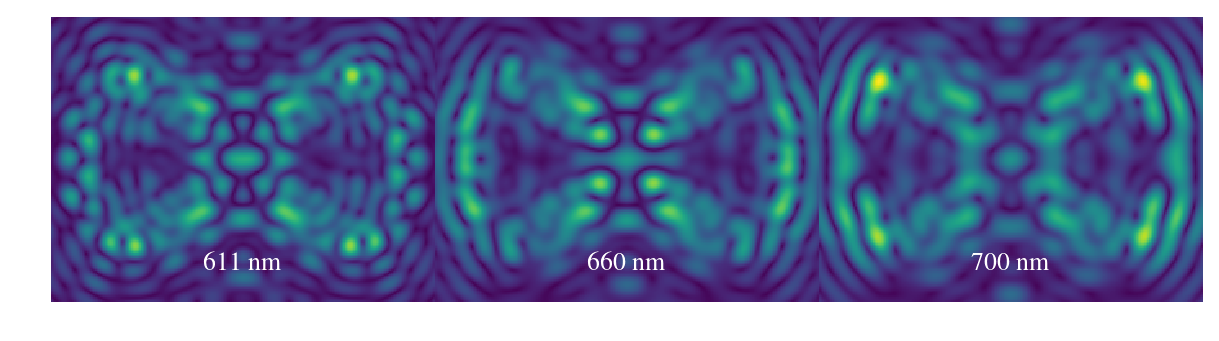

In [13]:
%pylab inline --no-import-all
from crispy.tools.reduction import calculateWaveList
import matplotlib as mpl
from matplotlib.colors import LogNorm
lam_midpts,lam_endpts = calculateWaveList(par,method='optext')
print lam_midpts
print 660.*np.linspace(1.-0.18/2,1.+0.18/2,45)

cube = Image(filename='/Users/mrizzo/IFS/OS5/with_lowfc/os5_spc_031.fits').data
print cube.shape
plt.figure()
plt.imshow(np.sqrt(cube[15,70:-70,40:-40]))
print cube[15,70:-70,40:-40].shape
h,w = cube[15,70:-70,40:-40].shape
outarray = np.zeros((h,w*3))
outarray[:,:w] = cube[4,70:-70,40:-40]
outarray[:,w:w*2] = cube[22,70:-70,40:-40]
outarray[:,w*2:] = cube[-8,70:-70,40:-40]
plt.figure(figsize=(16,4))
plt.imshow(np.sqrt(outarray),vmin=1e-14)
plt.axis('off')
plt.annotate('611 nm',xy=(w/2.-25,20),color='white',fontsize=26)
plt.annotate('660 nm',xy=(w+w/2.-25,20),color='white',fontsize=26)
plt.annotate('700 nm',xy=(2*w+w/2.-25,20),color='white',fontsize=26)
print np.amax(outarray)
plt.tight_layout()
plt.subplots_adjust(left=0.0, right=1, top=1, bottom=0)
plt.savefig("/Users/mrizzo/Downloads/InputSlices.png",dpi=200)

crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_noiseless/average/average_target_star_detector.fits
2.31331e-17


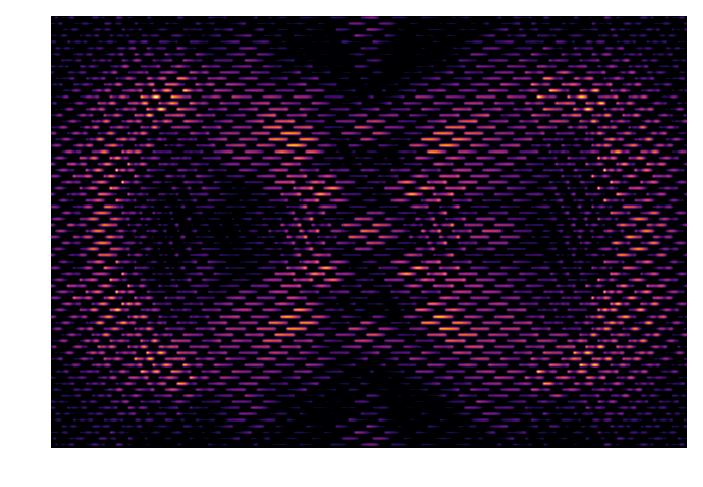

In [14]:
cmap='inferno'
IFS_detector = Image(filename='/Users/mrizzo/IFS/OS5_SIM_2.0_noiseless/average/average_target_star_detector.fits').data
import matplotlib.colors as colors
plt.figure(figsize=(9.0,6))
img = IFS_detector[300:-300,200:-200]
print np.amin(img)
plt.imshow(img,cmap=cmap,vmin=1e-5,norm=colors.PowerNorm(gamma=1./2.))
# plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.0, right=1, top=1, bottom=0)
plt.savefig("/Users/mrizzo/Downloads/DetectorMap.png",dpi=200)

crispy - INFO - Read data from HDU 1 of /Users/mrizzo/IFS/OS5_SIM_2.0_t1000/average_47Umac/average_target_star_detector.fits
3.67094e-05


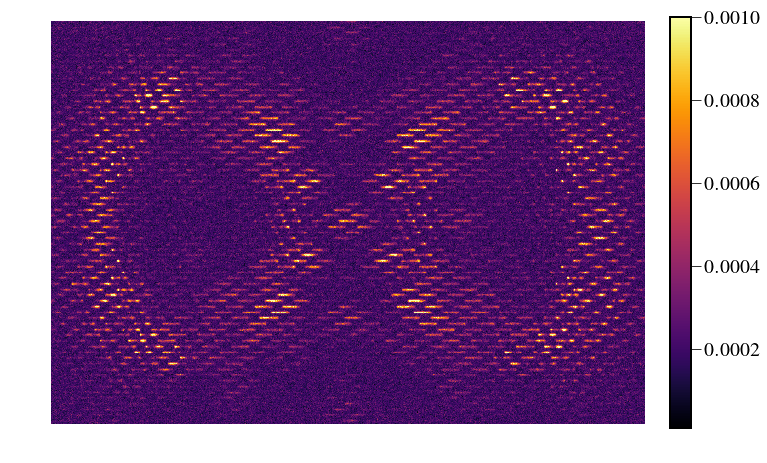

In [15]:
IFS_detector = Image(filename='/Users/mrizzo/IFS/OS5_SIM_2.0_t1000/average_47Umac/average_target_star_detector.fits').data
import matplotlib.colors as colors
plt.figure(figsize=(10,6))
img = IFS_detector[300:-300,200:-200]
print np.amin(img)
plt.imshow(img,cmap='inferno',vmin=1e-5,vmax=1e-3)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.0,bottom=0)
plt.savefig("/Users/mrizzo/Downloads/NoisyDetectorMap.png",dpi=200)

In [16]:
IFS_detector = Image(filename=par.exportDir+'/average.fits').data
plt.figure(figsize=(10,6))
img = IFS_detector[400:-130,300:-300]
print np.amin(img)
plt.imshow(img,cmap='inferno',vmin=1e-5,vmax=1e-3)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.0,bottom=0)
plt.savefig("/Users/mrizzo/Downloads/NoisyDetectorMap_Starshade.png",dpi=200)

crispy - ERROR - Unable to read data and header from ..//SimResults/average.fits


TypeError: 'NoneType' object has no attribute '__getitem__'

In [ ]:
IFS_detector = Image(filename=par.exportDir+'/normalized_cube.fits').data
plt.figure(figsize=(10,6))
img = IFS_detector[5,38:-23,36:-40]
print np.amin(img)
plt.imshow(img,cmap='inferno',vmin=-1e-10,vmax=5e-10)
#plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.0,bottom=0)
plt.savefig("/Users/mrizzo/Downloads/NoisyExtractedCube_Starshade.png",dpi=300)

In [ ]:
cube = Image(filename='/Users/mrizzo/IFS/OS5_SIM_2.0_noiseless/average/average_target_star_detector_red_optext_flatfielded.fits').data
print cube.shape
trim = 30
plt.imshow(np.sqrt(cube[15,trim:-trim,trim:-trim]))
print cube[15,trim:-trim,trim:-trim].shape
h,w = cube[15,trim:-trim,trim:-trim].shape
outarray = np.zeros((h,w*3))
outarray[:,:w] = cube[1,trim:-trim,trim:-trim]
outarray[:,w:w*2] = cube[11,trim:-trim,trim:-trim]
outarray[:,w*2:] = cube[-6,trim:-trim,trim:-trim]
plt.figure(figsize=(12,4))
plt.imshow(outarray,vmin=1e-10,norm=colors.PowerNorm(gamma=1./2.),cmap=cmap)
plt.axis('off')
plt.annotate('611 nm',xy=(w/2.-20,5),color='white',fontsize=26)
plt.annotate('660 nm',xy=(w+w/2.-20,5),color='white',fontsize=26)
plt.annotate('700 nm',xy=(2*w+w/2.-20,5),color='white',fontsize=26)
print np.amax(outarray)
plt.tight_layout()
plt.subplots_adjust(left=0.0, right=1, top=1, bottom=0)
plt.savefig("/Users/mrizzo/Downloads/OutputSlices.png",dpi=200)

## Residuals

In [ ]:
BB = Image(par.codeRoot+'/Inputs/BB.fits').data
BBres = Image(par.exportDir+'/BB_red_lstsq_resid.fits').data
# from crispy.params import Params
# par=Params(codefolder)
# par.wavecalDir = par.prefix+'/wavecalR50_660/'
# BB = Image(par.wavecalDir+'polychromeR50stack.fits').data
# BBres = reduceIFSMap(par,par.wavecalDir+'polychromeR50stack.fits',method='lstsq')
# BBres=BBres.data
# plt.figure(figsize=(20,12))
# plt.imshow(BBres)
plt.figure(figsize=(20,12))
plt.imshow(BBres[850:-50,150:300]/np.amax(BB[850:-50,150:300]),cmap='coolwarm')
plt.colorbar()
# plt.imshow(BB[100:200,850:950])
# plt.imshow(BBres[100:200,850:950])

In [ ]:
from astropy.io import fits
BB = fits.getdata(par.codeRoot+"/Inputs/BB.fits")
BBres = fits.getdata(par.exportDir+'/BB_red_lstsq_resid.fits')
BBmod = fits.getdata(par.exportDir+'/BB_red_lstsq_model.fits')
cmap='viridis'
ftsize = 15
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(BB[850:-100,150:300].T,vmin=-50,vmax=1000,cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Data',fontsize=ftsize)
plt.subplot(132)
plt.imshow(BBmod[850:-100,150:300].T,vmin=-50,vmax=1000,cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Model',fontsize=ftsize)
plt.subplot(133)
plt.imshow(100*BBres[850:-100,150:300].T/np.amax(BB[850:-120,150:300].T),vmin=-10,vmax=10,cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Residuals (% of data max)',fontsize=ftsize)
plt.tight_layout()
plt.show()

## Simple broadband map

In [ ]:
BB = Image(par.codeRoot+'/Inputs/BB.fits').data
flat = Image(par.codeRoot+'/Inputs/Flat637.fits').data

plt.figure(figsize=(20,12))
plt.subplot(121)
plt.imshow(flat[400:500,150:300],cmap='inferno')
plt.axis('off')
plt.subplot(122)
plt.imshow(BB[400:500,150:300],cmap='inferno')
plt.axis('off')
plt.tight_layout()
plt.savefig("/Users/mrizzo/Downloads/flatBB.png",dpi=200)
plt.show()

## Bijan's SPC PSF explanation

In [ ]:
from crispy.params import Params
from crispy.tools.inputScene import adjust_krist_header
from crispy.IFS import polychromeIFS

par = Params('../../../crispy')
offaxis = Image('/Users/mrizzo/IFS/OS5/offaxis/spc_offaxis_psf.fits')
adjust_krist_header(offaxis,lamc=660.)
fileshape = offaxis.data.shape
par.saveRotatedInput = True
lamlist = 660.*np.linspace(1.-par.BW/2.,1.+par.BW/2.,fileshape[0])
detector = polychromeIFS(par,lamlist,offaxis,QE=True)

In [ ]:
from astropy.io import fits
rotatedPSF = fits.getdata(par.exportDir+'/imagePlaneRot.fits')
fontsize=20
print(rotatedPSF.shape)
plt.figure(figsize=(15,15))
plt.subplot(132)
fig = rotatedPSF[25,21:40,43:54]
fig /= np.amax(fig)
plt.imshow(fig)
print fig[fig>0.5]
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.axis('off')
figshape = fig.shape
x = np.arange(figshape[1])
y = np.arange(figshape[0])
X,Y = np.meshgrid(x,y)
CS=plt.contour(X,Y,fig,levels=np.array([0.25,0.5,0.75]),colors='w')
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Offaxis PSF on lenslet array',fontsize=fontsize)
plt.subplot(131)
fig = offaxis.data[25,90:171,175:222]
plt.imshow(fig/np.amax(fig))
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')


plt.title('Offaxis PSF from John Krist',fontsize=fontsize)
plt.axis('off')
plt.subplot(133)
fig = detector[410:600,640:750]

plt.imshow(fig/np.amax(fig))
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')

plt.axis('off')
plt.title('Offaxis PSF on IFS detector',fontsize=fontsize)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))

fig = detector[480:530,640:750]
fig /= np.amax(fig)
plt.imshow(fig)
plt.axis('off')
plt.title('Center of Offaxis PSF on IFS detector',fontsize=fontsize)
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
figshape=fig.shape
x = np.arange(figshape[1])
y = np.arange(figshape[0])
X,Y = np.meshgrid(x,y)
CS=plt.contour(X,Y,fig,levels=np.array([0.25,0.5,0.75]),colors='w')
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.use("Agg")
import matplotlib.animation as animation
plt.rc('font', family='serif', serif='Times',size=15)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure',titlesize=25)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['axes.linewidth'] = 2.

# import sys
# codefolder = '../../../../crispy'
# if codefolder not in sys.path: sys.path.append(codefolder)
import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('main')
from crispy.tools.image import Image


In [ ]:
averagepath = '/Users/mrizzo/IFS/OS5_SIM_2.0_t1000_770/average_47Umac_770/average_target_star_detector_red_optext_flatfielded.fits'
average = Image(averagepath)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Maxime Rizzo'), bitrate=1800)

fig = plt.figure(figsize=(10,10),facecolor='black')

ims = []
trim=5
plt.axis('off')
for i in np.arange(average.data.shape[0]):
    ims.append((plt.imshow(average.data[i,trim:-trim,trim:-trim],cmap='inferno'),))

im_ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=3000)
im_ani.save('optext.mp4', writer=writer,savefig_kwargs={'facecolor':'black'})


In [ ]:
averagepath = '/Users/mrizzo/IFS/OS5_SIM_2.0_t1000_770/average_47Umac_770/convolved_normalized.fits'
average = Image(averagepath)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Maxime Rizzo'), bitrate=1800)

fig = plt.figure(figsize=(10,10),facecolor='black')

average.data[average.data==0] = np.NaN
ims = []
trim=30
plt.axis('off')
for i in np.arange(average.data.shape[0]):
    ims.append((plt.imshow(average.data[i,trim:-trim,trim:-trim],cmap='inferno',vmin=1e-10,vmax=6e-9),))

im_ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=3000)
im_ani.save('convolved.mp4', writer=writer,savefig_kwargs={'facecolor':'black'})


In [ ]:


from scipy import ndimage
from crispy.tools.inputScene import calc_contrast
fontsize=25
# from scipy.interpolate import interp1d
res = np.loadtxt(averagefolder+'/final_signal_cube_1000.txt')
dat = np.mean(res,axis=0)
err = np.std(res,axis=0)

Nlam = 150
lams=660.*np.linspace(1-par.BW/2.,1+par.BW/2.,Nlam)
par.wavecalDir = par.prefix+'/wavecalR50_660/'
lam_midpts660,junk = calculateWaveList(par,method='optext')
real_spectr660 = calc_contrast(lams,distance=3.6, radius=1.27,filename=par.codeRoot+"/Inputs/Jupiter_1x_5AU_90deg.dat",albedo=0.25)
plt.figure(figsize=(20,12))
plt.plot(lams,real_spectr660,color='#1777b4',label='Original spectrum',lw=3)
smooth = ndimage.filters.gaussian_filter1d(real_spectr660,2.*Nlam/19./2.35,order=0,mode='nearest')

plt.fill_between(lams,0.9*real_spectr660,1.1*real_spectr660,color='Gray',alpha=0.3,label='10% envelope of original spectrum')
plt.plot(lams,smooth,label='R=50 spectrum',lw=3,color='#d62728',linestyle='--')

ratio660 = np.mean(real_spectr660)/np.mean(dat)
print("Correction factor due to incorrect photon-counting compensation: ",ratio660)
plt.errorbar(lam_midpts660,dat*ratio660,yerr=err*ratio660,fmt='o',markersize=15,elinewidth=3,color='#2ca02c',label='Average and 1-$\sigma$ deviation of recovered spectrum')
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%.1f" % x, locs*1e9))
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.ylabel('Contrast (x1e-9)',fontsize=fontsize)
plt.xlabel('Wavelength (nm)',fontsize=fontsize)
plt.title('OS5: 47 Uma c with RDI, 100 ks on target, average',fontsize=35)
plt.legend(fontsize=fontsize,loc=3)
plt.tight_layout()
plt.savefig("/Users/mrizzo/Downloads/OS5_27hrs.png",dpi=200)

plt.figure(figsize=(20,12))
plt.plot(lams,real_spectr660,color='#1777b4',label='Original spectrum',lw=3)
plt.fill_between(lams,0.9*real_spectr660,1.1*real_spectr660,color='Gray',alpha=0.3,label='10% envelope of original spectrum')
plt.plot(lams,smooth,label='R=50 spectrum',lw=3,color='#d62728',linestyle='--')
plt.errorbar(lam_midpts660,res[60]*ratio660,yerr=err*ratio660,fmt='o',markersize=15,elinewidth=3,color='#2ca02c',label='Recovered spectrum')
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%.1f" % x, locs*1e9))
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.ylabel('Contrast (x1e-9)',fontsize=fontsize)
plt.xlabel('Wavelength (nm)',fontsize=fontsize)
plt.title('OS5: 47 Uma c with RDI, 100 ks on target, single trial',fontsize=35)
plt.legend(fontsize=fontsize,loc=3)
plt.tight_layout()
plt.savefig("/Users/mrizzo/Downloads/OS5_27hrs_single_trial.png",dpi=200)